In [19]:
# %load fuquan_v2.py
## this cell get the data in the certain time range we are interest
#  a simple trate strategy
import os
import pandas as pd
from package_path_define.path_define import *
from package_readdata.read_data import find_stocks_in_date_range_fuquan
from package_readdata.read_data import read_vol_price_data_fuquan
from package_plot.plot_data import *
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
#-- plot module
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
import matplotlib.pyplot as plt
#print path_fuquan
market='shenzhen'
year1=2016
year2=2017
path1='\\'.join([path_fuquan,market])
sto1=os.listdir(path1)
sto2='000019'
#sto2=sto1[10]
#print sto1
stock_full_path='\\'.join([path1,sto2])
print stock_full_path
files=os.listdir(stock_full_path)
file_num_in=find_stocks_in_date_range_fuquan(stock_full_path,year1,year2) #--- find the stock files in the year range we give


def data_get(stock_full_path,files,file_num_in):
    df_m1 = pd.DataFrame() ## create a blank dataframe
    for num_in in file_num_in:
        file_in='\\'.join([stock_full_path,files[num_in]])
        #print file_in
        df1=read_vol_price_data_fuquan(file_in)
        df_m1=df_m1.append(df1,ignore_index=False)
        #print df1.head()
        #print len(df1)
    date1=df_m1.date.values
    years=[]
    months=[]
    for da in date1:
        year=da[0:4]
        month=da[5:7]
        years.append(int(year))
        months.append(int(month))
    df_m1['year']=years
    df_m1['month']=months
    return df_m1
data_df1=data_get(stock_full_path,files,file_num_in)
print data_df1.head()
data_df1= data_df1.reset_index(drop=True)  #---- reset the index from 0

# In[104]:







G:\\stock\\data\\fuquan\shenzhen\000019
          date    open    high   close     low      volume  trade_amount  \
58  2016-01-04  54.599  56.119  49.682  49.650   6757351.0   108794976.0   
57  2016-01-05  46.351  48.130  45.736  44.701  11551641.0   165056544.0   
56  2016-01-06  46.254  47.548  47.062  45.380   7918956.0   114599928.0   
55  2016-01-07  46.804  46.804  42.372  42.372   2166600.0    29121180.0   
54  2016-01-08  42.534  43.925  41.726  38.265   8893709.0   114697224.0   

    fuquan_factor  year  month  
58          3.235  2016      1  
57          3.235  2016      1  
56          3.235  2016      1  
55          3.235  2016      1  
54          3.235  2016      1  


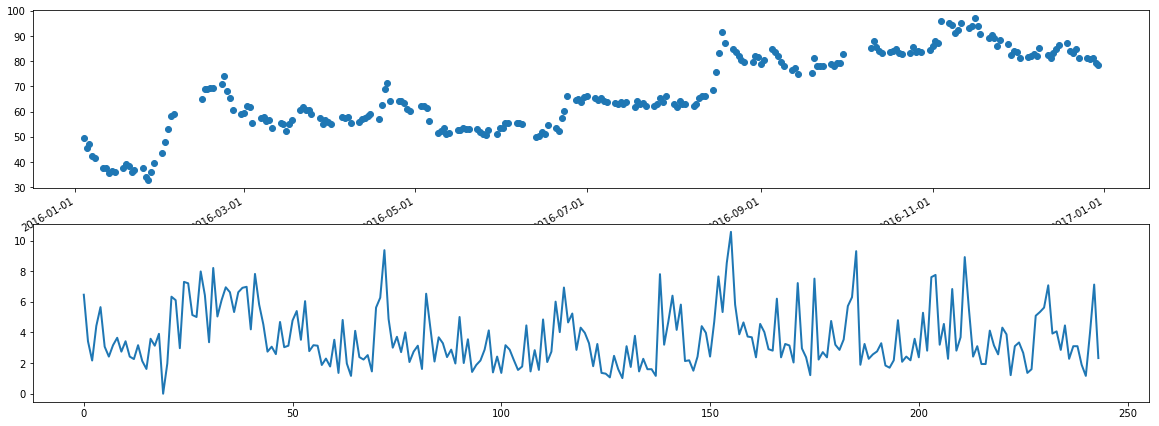

In [20]:
dates=data_df1.date.values

# print data_df1.head()
# print data_df1.volume.mean()
# print data_df1.volume.std()
#df3=data_df1[data_df1.volume>80000000]
df3=data_df1.high-data_df1.low
#print df3

fig=plt.figure(figsize=(20, 8))
ax1=fig.add_subplot(211)
# fig, ax = plt.subplots(figsize=(20, 8))
ax1.plot_date(dates, data_df1.close,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

ax2=fig.add_subplot(212)
# fig, ax = plt.subplots(figsize=(20, 8))
ax2.plot(df3,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
#ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
#fig.autofmt_xdate()
plt.show()

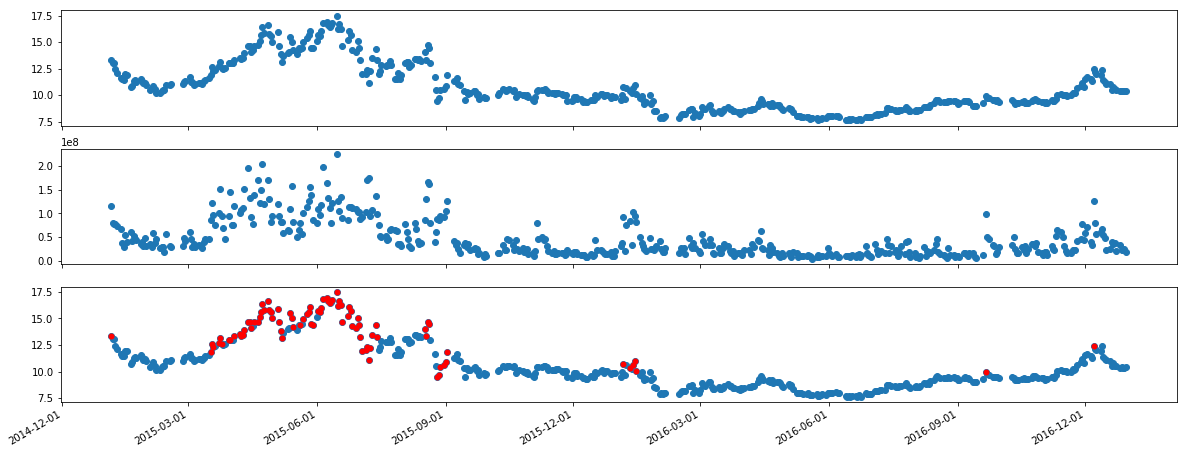

In [56]:

dates=data_df1.date.values
#print dates
# plt.figure(21)

fig=plt.figure(figsize=(20, 8))
ax1=fig.add_subplot(311)
# fig, ax = plt.subplots(figsize=(20, 8))
ax1.plot_date(dates, data_df1.close,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
           
ax2=fig.add_subplot(312)
# fig, ax = plt.subplots(212,figsize=(20, 8))
ax2.plot_date(dates, data_df1.volume,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()   

date1=df3.date.values
ax3=fig.add_subplot(313)
ax3.plot_date(dates, data_df1.close,linewidth=2)
ax3.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
ax3.plot_date(date1, df3.close,'.',color='red',mew=3)
ax3.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()   
        
plt.show()


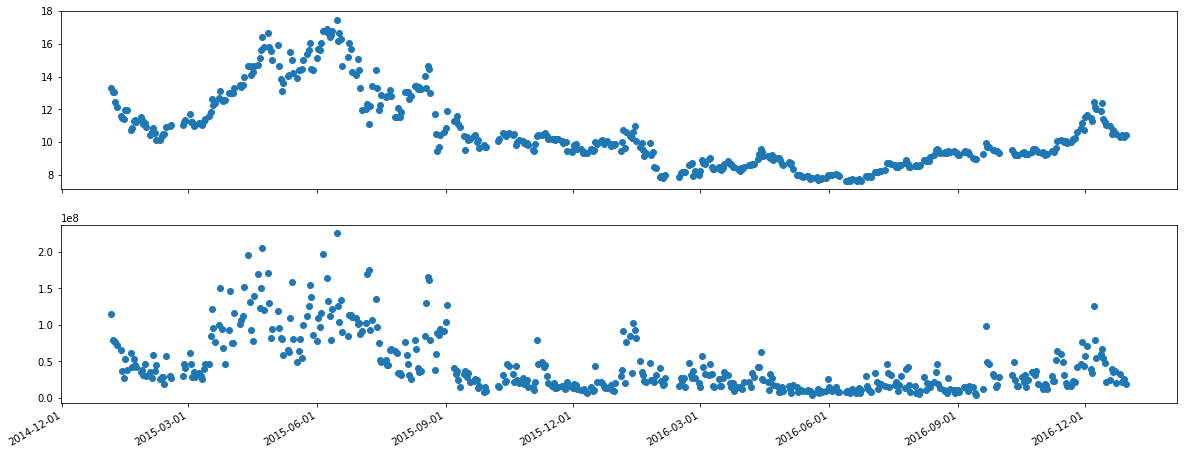

In [37]:

dates=data_df1.date.values
#print dates
# plt.figure(21)
fig=plt.figure(figsize=(20, 8))
ax1=fig.add_subplot(311)
# fig, ax = plt.subplots(figsize=(20, 8))
ax1.plot_date(dates, data_df1.close,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
           
ax2=fig.add_subplot(312)
# fig, ax = plt.subplots(212,figsize=(20, 8))
ax2.plot_date(dates, data_df1.volume,linewidth=2)
#x.plot_date(date1, df3.low,'.',color='red',mew=10)
ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()   
           
plt.show()



In [18]:
### get the  minimum in each groupby
# get the index of minimum in each groupby
#print data_df1
data_df2= data_df1.reset_index(drop=True)  #---- reset the index from 0
#print data_df2.groupby(['year'])['low'].min() # get the  minimum in each groupby
idx=data_df2.groupby(['year'])['low'].transform(min)==data_df2['low']  # get the index of minimum in each groupby
df3=data_df2[idx]


In [19]:


# http://matplotlib.org/examples/pylab_examples/date_demo1.html
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
import matplotlib.pyplot as plt

dates=data_df2.date.values
date1=df3.date.values
fig, ax = plt.subplots( figsize=(20, 8))
ax.plot_date(dates, data_df2.low,'.',linewidth=2)
ax.plot_date(date1, df3.low,'.',color='red',mew=10)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.show()

KeyboardInterrupt: 